简单的回归问题-波士顿房价问题

In [9]:
import tensorflow as tf
from tensorflow.keras import models, datasets, layers
import numpy as np
import matplotlib.pyplot as plt

In [10]:
(x_train, y_train), (x_test, y_test) = datasets.boston_housing.load_data()

404 个训练样本，102 个测试样本，每个样本 13 个数值特征

In [11]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_train)

(404, 13) (404,)
(102, 13) (102,)
[[1.23247e+00 0.00000e+00 8.14000e+00 ... 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 ... 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.75520e+02
  3.26000e+00]
 ...
 [3.46600e-02 3.50000e+01 6.06000e+00 ... 1.69000e+01 3.62250e+02
  7.83000e+00]
 [2.14918e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 2.61950e+02
  1.57900e+01]
 [1.43900e-02 6.00000e+01 2.93000e+00 ... 1.56000e+01 3.76700e+02
  4.38000e+00]]


In [12]:
x_train.mean(axis=0)

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [13]:
def preprocess_data(x_train ,x_test):
    mean = x_train.mean(axis=0)
    std = x_train.std(axis=0)
    x_train = (x_train - mean) / std 
    
    x_test = (x_test - mean) / std 
    return (x_train, x_test)

In [14]:
def build_model():
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape = (x_train.shape[1], )),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


K折验证

In [ ]:
k = 4
num_val_samples = len(x_train) // k
num_epochs = 500
all_scores = []
all_mae_histories = []

for i in range(k):
    # 验证集
    x_val = x_train[i * num_val_samples: (i+1) * num_val_samples]
    y_val = y_train[i * num_val_samples: (i+1) * num_val_samples]

    # 训练集
    x_train_data = np.concatenate([x_train[:i * num_val_samples], x_train[(i+1) * num_val_samples:]], axis=0)
    y_train_data = np.concatenate([y_train[:i * num_val_samples], y_train[(i+1) * num_val_samples:]], axis=0)

    model = build_model()
    # 训练
    history = model.fit(x_train_data, y_train_data, validation_data=(x_val, y_val), batch_size=1, epochs=num_epochs, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
    # verbose：日志显示
    # val_mse, val_mae = model.evaluate(x_val, y_val, verbose=0)
    # all_scores.append(val_mae)


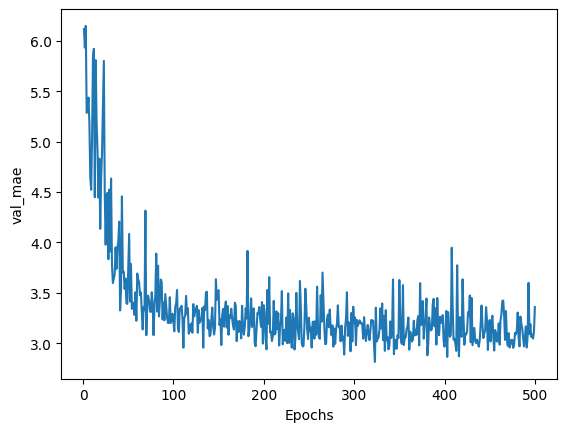

In [8]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('val_mae')
plt.show()

指数移动平均值

In [9]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

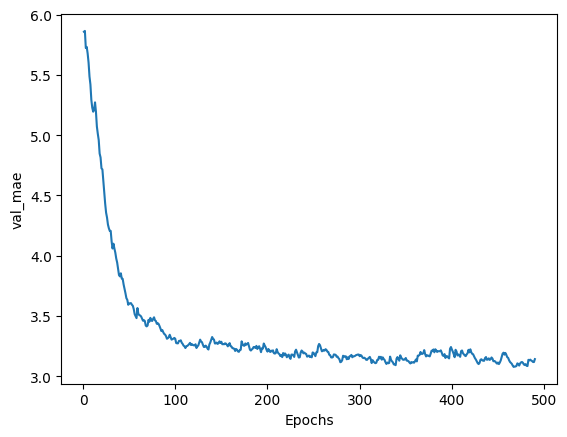

In [10]:
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history)+1),smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('val_mae')
plt.show()